In [1]:
#!pip install geopandas

# Importando bibliotecas

In [2]:
import numpy as np
import pandas as pd
import geopandas
%matplotlib inline

# Carregando dados e fazendo tratamentos iniciais

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/profmoisesomena/MapaEstacoes/master/estacoes_es_temp.csv",header=0)
df['Altitude'] = df['Altitude'].astype(np.str)
df_replace = df.apply(lambda x: x.str.replace(',','.'))
df_replace.columns = ['municipios', 'altitude', 'X_coord', 'Y_coord', 'CHUVA', 'ETP', 'ETR','DEF', 'EXC', 'ER_ETP', 'temp_m_ano']

### Definindo como float os atributos de longitude ("X_coord") e Latitude ("Y_coord")

In [4]:
df_replace['X_coord'] = df_replace['X_coord'].astype('float64')
df_replace['Y_coord'] = df_replace['Y_coord'].astype('float64')

# Transformando objeto pandas dataframe para Geopandas

In [5]:
gdf = geopandas.GeoDataFrame(
    df_replace, geometry=geopandas.points_from_xy(df_replace.X_coord, df_replace.Y_coord))

In [6]:
gdf.head()

,municipios,altitude,X_coord,Y_coord,CHUVA,ETP,ETR,DEF,EXC,ER_ETP,temp_m_ano,geometry
0,EstacaoMeteorologicaES1,66,-39.96,-18.30,1036.98,1382.2942366086,1036.98000001,345.314236598604,0,0.750187603005698,24.8495505,POINT (-39.96000 -18.30000)
1,EstacaoMeteorologicaES2,3,-39.75,-18.56,1164.71666666667,1413.22794782128,1164.71666667667,248.511281144616,0,0.824153434321946,25.0615323333333,POINT (-39.75000 -18.56000)
2,EstacaoMeteorologicaES3,6,-39.76,-18.95,1394.9,1397.76396748073,1298.4981621532,99.2658053275267,96.4018378467982,0.928982426477598,24.9599734166667,POINT (-39.76000 -18.95000)
3,EstacaoMeteorologicaES4,180,-40.75,-18.99,1250.84333333333,1341.71057911408,1151.70505396225,190.005525151833,99.1382793710854,0.858385610049157,24.5298230833333,POINT (-40.75000 -18.99000)
4,EstacaoMeteorologicaES5,90,-40.09,-18.49,1127.65,1367.36500656194,1127.65000001,239.715006551938,0,0.824688356509379,24.74304925,POINT (-40.09000 -18.49000)


### Plotando visualmente os pontos com base na latitude e longitude

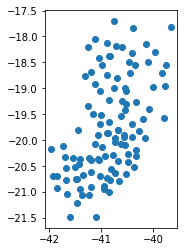

In [7]:
gdf.plot()

### Definindo um CRS padrão

In [8]:
from pyproj import CRS
gdf.crs  = CRS(4326)
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Escrevendo um Shapefile (na projeção default previamente definida )

In [9]:
out_default_crs = r"generate_shapes/estacoes.shp"
gdf.to_file(out_default_crs)

In [10]:
!ls "generate_shapes/"

estacoes.cpg  estacoes.dbf  estacoes.prj  estacoes.shp	estacoes.shx


### Reprojetando shapefile com base em um novo CRS

In [11]:
out_new_crs = epsg=32724
new_gdf = gdf.to_crs(out_new_crs) 
out = r"generate_shapes/estacoes_rep.shp"
new_gdf.to_file(out)

### Escrevendo um Shapefile (na nova projeção)

In [12]:
!ls "generate_shapes/"

estacoes.cpg  estacoes_rep.cpg	estacoes_rep.shp  estacoes.shx
estacoes.dbf  estacoes_rep.dbf	estacoes_rep.shx
estacoes.prj  estacoes_rep.prj	estacoes.shp


# Classe simplificada para obenção de Shapefile de pontos por meio de pandas dataframe com valores de longitude e latitude

In [13]:
class pandasdf_to_shapefile_points:
    """
    Obtem um dataframe com atributos longitude do tipo float e latitude do tipo 
    float para criar shapefile com base nas informações dos pontos de latitude e longitude 
    
    df: objeto dataframe
    
    long_column: coluna com informacoes de longitude (deve ser do tipo float)
    
    lati_column: coluna com informacoes de latitude (deve ser do tipo float)
    
    crs_orig: possibilita aplicar um crs default (valor padrão e epsg:4326 - EPSG:4326 - WGS 84 - Geográfico)
    
    crs_dest: possibilita reprojetar o shapefile com base no defaul (valor padrao e 32724 / EPSG:32724 - WGS 84 / UTM zone 24S - Projetado)
    
    
    
    """
    import numpy as np
    import pandas as pd
    import geopandas
    from pyproj import CRS
    
    def __init__(self,pandas_df,long_column,lati_column,
                 crs_orig=4326,crs_change=False,crs_dest=32724,out_path="out_shapefile.shp"):
        self.gdf = geopandas.GeoDataFrame(
    pandas_df, geometry=geopandas.points_from_xy(pandas_df[long_column], pandas_df[lati_column]))
        self.gdf.crs  = CRS(crs_orig)
        if crs_change:
            self.gdf = gdf.to_crs(crs_dest) 
        self.gdf.to_file(out_path)


    def get_geopandas(self):
        return self.gdf

In [14]:
pf = pandasdf_to_shapefile_points(df_replace,'X_coord','Y_coord')
!ls out*

out_shapefile.cpg  out_shapefile.prj  out_shapefile.shx
out_shapefile.dbf  out_shapefile.shp


# References
conversão de dataframe column com astype:<br>
https://datatofish.com/convert-string-to-float-dataframe/ <br>
https://www.ritchieng.com/pandas-changing-datatype/<br>
https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/<br>
https://pbpython.com/pandas_dtypes.html

Convertendo pandas dataframe para geopandas:<br>
https://geopandas.org/gallery/create_geopandas_from_pandas.html<br>

Básico de geopandas com leitura e criação de shapefiles:<br>
https://automating-gis-processes.github.io/CSC18/lessons/L2/geopandas-basics.html

Reprojetando dados com geopandas: <br>
https://gis.stackexchange.com/questions/328952/reprojecting-data-with-geopandas-using-to-crs

Tipos de dados numpy:<br>
https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float64

Classe e Objetos - Fundamentos (Python)<br>
https://panda.ime.usp.br/pensepy/static/pensepy/13-Classes/classesintro.html